In [5]:
#downloading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#voice df outlook
voice_df = pd.read_csv ('voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
#checking null values
voice_df.isna().sum() 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
#piechart
m,f = voice_df['label'].value_counts()
print(m)
print(f)

1584
1584


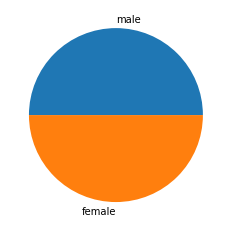

In [9]:
arr = np.array([m,f])
labels = ["male", "female"]
plt.pie(arr, labels = labels)
plt.show()

In [10]:
selected_features = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
x = voice_df[selected_features]
y = voice_df.label
print(x.shape)
print(y.shape)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20)

(3168, 20)
(3168,)


In [11]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [12]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [13]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


In [14]:
#logisticRegression model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)

ypred = logReg.predict(xtest)

D:\coding stuff\Jupyter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#Confusion matrix for Logistic Regression
cmLR = confusion_matrix(ytest, ypred)
print(cmLR)
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[252  79]
 [ 36 267]]
              precision    recall  f1-score   support

      female       0.88      0.76      0.81       331
        male       0.77      0.88      0.82       303

    accuracy                           0.82       634
   macro avg       0.82      0.82      0.82       634
weighted avg       0.83      0.82      0.82       634

0.8186119873817035


In [16]:
#KNN Classifier n=5
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [17]:
#KNN predictions for test dataset
ypredKNN = KNN.predict(xtest)

In [43]:
#confusionmatrix for KNN
cmKNN = confusion_matrix(ytest, ypredKNN)
print(cmKNN)
print(classification_report(ytest,ypredKNN))
print(accuracy_score(ytest,ypredKNN))

[[239  92]
 [ 92 211]]
              precision    recall  f1-score   support

      female       0.72      0.72      0.72       331
        male       0.70      0.70      0.70       303

    accuracy                           0.71       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.71      0.71      0.71       634

0.7097791798107256


In [19]:
#KNN Classifier n=7
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(xtrain,ytrain)
ypredKNN = KNN.predict(xtest)
cmKNN = confusion_matrix(ytest, ypredKNN)
print(classification_report(ytest,ypredKNN))

              precision    recall  f1-score   support

      female       0.72      0.67      0.69       331
        male       0.67      0.72      0.69       303

    accuracy                           0.69       634
   macro avg       0.69      0.69      0.69       634
weighted avg       0.69      0.69      0.69       634



In [20]:
#KNN Classifier n=3
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(xtrain,ytrain)
ypredKNN = KNN.predict(xtest)
cmKNN = confusion_matrix(ytest, ypredKNN)
print(classification_report(ytest,ypredKNN))

              precision    recall  f1-score   support

      female       0.72      0.72      0.72       331
        male       0.70      0.70      0.70       303

    accuracy                           0.71       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.71      0.71      0.71       634



In [27]:
#Desicion tree classifier (gini, depth 7, split = 15)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth= 7, min_samples_split=10)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [44]:
ypreddt = dt.predict(xtest)
cmdt = confusion_matrix(ytest, ypreddt)
print(cmdt)
print(classification_report(ytest,ypreddt))
print(accuracy_score(ytest,ypreddt))

[[318  13]
 [  9 294]]
              precision    recall  f1-score   support

      female       0.97      0.96      0.97       331
        male       0.96      0.97      0.96       303

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

0.9652996845425867


In [33]:
#random forrest classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth = 5, min_samples_split = 10)

In [45]:
RF.fit(xtrain,ytrain)
ypredRF = RF.predict(xtest)
cmRF = confusion_matrix(ytest, ypredRF)
print(cmRF)
print(classification_report(ytest,ypredRF))
print(accuracy_score(ytest,ypredRF))

[[320  11]
 [  4 299]]
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       331
        male       0.96      0.99      0.98       303

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

0.9763406940063092


In [47]:
#svm Classifier
from sklearn.svm import SVC
SVM = SVC(kernel  = "linear", C=1)
SVM.fit(xtrain,ytrain)
ypredSVM = SVM.predict(xtest)
cmSVM = confusion_matrix(ytest, ypredSVM)
print(cmSVM)
print(classification_report(ytest,ypredSVM))
print(accuracy_score(ytest,ypredSVM))

[[279  52]
 [  4 299]]
              precision    recall  f1-score   support

      female       0.99      0.84      0.91       331
        male       0.85      0.99      0.91       303

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634

0.9116719242902208


1)Initially there was no null value found

2)The albels are exactly equally distributed

3)test size is 20% of the complete dataset

4)All 5 classifiers are trained with respective model name acronyms, following their confusion matrices and Classification reports are printed

5)Final accuracy is as follows
    Logistic Regression - 0.8186119873817035
    KNN                 - 0.7097791798107256
    Decision Tree       - 0.9652996845425867
    Random Forest       - 0.9763406940063092
    SVM                 - 0.9116719242902208
    
6)From the following we can conclude that Random Forest is the most accurate model and Decision Tree follows it closely